#EMG freq analysis

Trying to fft the data to find out the feature of EMG signals.


##Hypthesis 
We can distinguish finger motion by using maximum freqency sepctrum.

##Data Recording

The all_fingers.csv file contains a recording done.

A person was doing the following activities: 

* thumb(label 0)
* index finger (label 1)
* middle finger (label 2)
* ring finger (label 3)
* littlefinger (label 4)

The sensor is attached to the subjects right wrist (x axis pointing towards the fingers). 
The sensor was sampled with 200 Hz, it's raw sensor data (not calibrated).

In [6]:
from pandas import read_csv
%pylab inline

data = read_csv('./data/all_finger2.csv',delimiter=',',names=['timestamp','pod0','pod1','pod2','pod3','pod4','pod5','pod6','pod7','label'])

Populating the interactive namespace from numpy and matplotlib


#Data Exploration
After we read in the data, use the describe() function to get an overview.

In [7]:
data

,timestamp,pod0,pod1,pod2,pod3,pod4,pod5,pod6,pod7,label
0,1433224306418,2,1,31,-76,-10,-4,-12,-19,0
1,1433224306442,-8,8,62,34,2,4,37,31,0
2,1433224306461,3,-14,-80,-74,-30,-11,-4,16,0
3,1433224306485,13,8,71,18,5,1,29,9,0
4,1433224306504,0,33,-18,29,0,-1,8,12,0
5,1433224306525,23,-5,-41,56,-4,-4,-1,40,0
6,1433224306546,12,11,68,21,9,3,21,26,0
7,1433224306568,11,-6,-20,-33,-8,-1,-6,6,0
8,1433224306593,-56,14,6,-23,-3,-4,-21,-27,0
9,1433224306637,9,-25,-4,-17,-2,-2,-17,-22,0


##Segmenting the individual activities
Let's look at the hammering, screwdriving, sandpapering and sawing data individually.
You can use pandas filtering on the individual labels e.g.

accel_hammer = data[data['label']==1][['ax','ay','az']]

plot them and calculate the descriptive statistics (e.g. mean, var etc.).

Do you think the activitites can be recognized using these sensors?

Can you distinguish them?


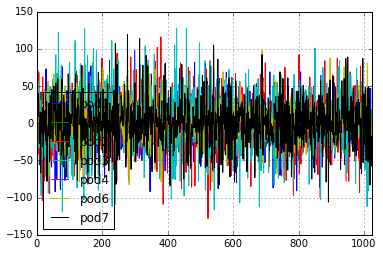

In [8]:
thumb = data[data['label']==0][['pod0','pod1','pod2','pod3','pod4','pod6','pod7']]
index = data[data['label']==1][['pod0','pod1','pod2','pod3','pod4','pod6','pod7']]
middle = data[data['label']==2][['pod0','pod1','pod2','pod3','pod4','pod6','pod7']]
ring = data[data['label']==3][['pod0','pod1','pod2','pod3','pod4','pod6','pod7']]
little = data[data['label']==4][['pod0','pod1','pod2','pod3','pod4','pod6','pod7']]

thumb.plot()

#Finding Features

You can use scatter() to plot the different features against each other ...
If you use hold on it can give you a hint if the data is distinguishable.

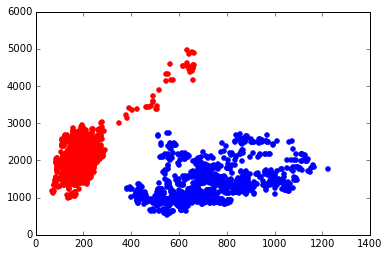

In [9]:
from pandas.stats.moments import rolling_apply

method = var
wsize = 50

thumb_var = rolling_apply(thumb, wsize, method).dropna()
little_var = rolling_apply(little, wsize, method).dropna()

scatter(thumb_var['pod0'],thumb_var['pod3'],color='blue')
scatter(little_var['pod0'],little_var['pod3'],color='red')


#Classification#
Let's split the data into chunks according to the activities and calculate the median over a sliding window (might not be the best feature).

In [10]:
thumb = data[data['label']==0][['pod0','pod1','pod2','pod3','pod4','pod5','pod6','pod7']]
little = data[data['label']==1][['pod0','pod1','pod2','pod3','pod4','pod5','pod6','pod7']]


from pandas.stats.moments import rolling_apply

method = var
wsize = 64

feat1 = rolling_apply(thumb, wsize, method).dropna()
feat2 = rolling_apply(little, wsize, method).dropna()

feat1

,pod0,pod1,pod2,pod3,pod4,pod5,pod6,pod7
63,896.328125,418.048584,1746.948975,1597.694336,99.464844,24.639648,592.491211,662.902344
64,896.108398,418.077881,1723.607178,1512.618896,98.382568,25.152344,625.186523,714.302490
65,901.803711,417.600586,1645.991211,1497.695068,98.550537,24.907959,612.409912,700.052490
66,910.390625,416.142334,1682.519287,1649.193115,104.331787,26.913818,627.720459,705.881836
67,907.156250,416.964600,1594.937256,1673.568115,104.730225,27.054443,618.811523,726.409912
68,907.814209,401.056396,1601.544678,1669.988037,104.730225,27.319336,623.261475,724.343750
69,898.772461,401.154053,1602.624023,1642.522461,104.545898,27.214600,649.921631,709.420898
70,895.165771,416.964600,1514.436523,1654.170898,103.842773,27.577148,651.558594,697.667725
71,899.217773,430.650146,1513.750000,1639.464844,103.842773,27.570068,651.116211,697.546875
72,969.624756,438.220459,1511.678711,1692.584961,107.929443,28.384521,702.246094,701.812500


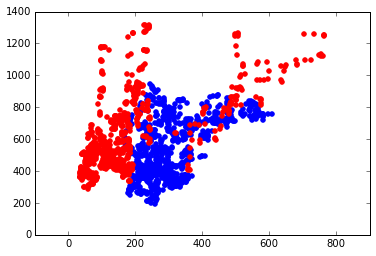

In [11]:
scatter(feat1['pod1'], feat1['pod6'],color='blue')
scatter(feat2['pod1'], feat2['pod6'],color='red')

In [12]:
#don't look here ... I split the data in test and training set
#bad code :)

l_1 = len(feat1)
l_2 = len(feat2)

#X = feat1.append(feat2).append(feat3).append(feat4)
#Y = [1.0] * l_1 + [2.0]* l_2 + [3] * l_3 + [4] * l_4

X = feat1[0:l_1/2].append(feat2[0:l_2/2])
Y = [0]*(l_1/2) + [1]*(l_2/2)

T = feat1[l_1/2:l_1].append(feat2[l_2/2:l_2])
t_gg = [2]*len(feat1[l_1/2:l_1]) + [1]*len(feat2[l_2/2:l_2])

185.888447283
28
21.875


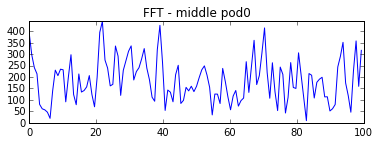

In [13]:
import numpy as np
from scipy import hamming
import matplotlib.pyplot as plt

sampling_freq = 200.0
ts = 1.0 / sampling_freq
size = 256
offset = 0

middle_test = middle['pod0'][offset:offset + size]
ring_test = ring['pod0'][offset:offset + size]

win = hamming(size)

temp_middle = np.fft.fft(middle_test * win)
temp_ring = np.fft.fft(ring_test * win)

frq = np.fft.fftfreq(size,ts)[0:size/2]

middle_freq = abs(temp_middle[0:size/2])

threshold = np.mean(middle_freq)

print(threshold)
print(argmax(middle_freq))
print(frq[argmax(middle_freq)])


plt.show()


[ 68.75  12.5    0.     0.     0.     0.    75.  ]


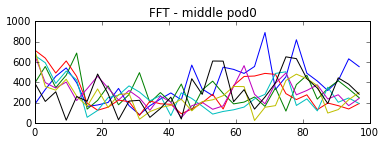

In [111]:
import numpy as np
from scipy import hamming
import matplotlib.pyplot as plt

sampling_freq = 200.0
ts = 1.0 / sampling_freq
size = 64
offset = 0

middle_test = middle[offset:offset + size]

win = hamming(size)

temp_middle = np.fft.fftn((middle_test.T * win).T)

frq = np.fft.fftfreq(size,ts)
frq[size/2] = sampling_freq/2
freq = frq[0:size/2]

middle_freq = abs(temp_middle[0:size/2])


print(frq[np.argmax(middle_freq, axis = 0)])

plt.subplot(2,1,1)
plt.title("FFT - middle pod0")
plt.plot(freq,abs(middle_freq))
plt.axis([0,sampling_freq / 2,0,1000])

plt.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

X contains the training data, Y the labels for the training data.
T contains the testing data, t_gg the labels for the testing data. Go ahead and train a classifier ... evaluate it.

In [57]:
dt.fit(X,Y)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

In [58]:
#if you have trained a classifier you can use this code for crossvaildation
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedKFold, cross_val_score

Xn, yn = shuffle(T, t_gg)
skf = StratifiedKFold(yn, 10)
print cross_val_score(dt, Xn, yn, cv=skf)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [59]:
res = dt.predict(T)

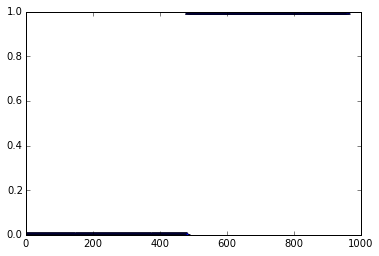

In [60]:
plot(res,'*')